<a href="https://colab.research.google.com/github/RoeeBenLevy/Real_Estate_Investment_Trust/blob/master/Project_1_Real_Estate_Investment_Trust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Investment Trust

## Business Problem


### 1.1 Problem Context

Our client is a large Real Estate Investment Trust (REIT).

They invest in houses, apartments, and condos(complex of buildings) within a small county in New York state.

As part of their business, they try to predict the fair transaction price of a property before it's sold.

They do so to calibrate their internal pricing models and keep a pulse on the market.


### 1.2 Problem Statement

The REIT has hired us to find a data-driven approach to valuing properties.

They currently have an untapped dataset of transaction prices for previous properties on the market.

The data was collected in 2016.

Our task is to build a real-estate pricing model using that dataset.

If we can build a model to predict transaction prices with an average error of under US Dollars 70,000, then our client will be very satisfied with the our resultant model.


### 1.3 Business Objectives and Constraints

Deliverable: Trained model file

Win condition: Avg. prediction error < $70,000

Model Interpretability will be useful.

No latency requirement.

##Machine Learning Problem

### 2.1 Data Overview

For this project:

The dataset has 1883 observations in the county where the REIT operates.

Each observation is for the transaction of one property only.
Each transaction was between USD200,000  and  USD800,000.

**Target Variable**

'tx_price' - Transaction price in USD


**Features of the data:**

**Public records:**

'tx_year' - Year the transaction took place

'property_tax' - Monthly property tax

'insurance' - Cost of monthly homeowner's insurance

**Property characteristics:**

'beds' - Number of bedrooms

'baths' - Number of bathrooms

'sqft' - Total floor area in squared feet

'lot_size' - Total outside area in squared feet

'year_built' - Year property was built

'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

'basement' - Does the property have a basement?

'exterior_walls' - The material used for constructing walls of the house

'roof' - The material used for constructing the roof

**Location convenience scores:**

'restaurants' - Number of restaurants within 1 mile

'groceries' - Number of grocery stores within 1 mile

'nightlife' - Number of nightlife venues within 1 mile

'cafes' - Number of cafes within 1 mile

'shopping' - Number of stores within 1 mile

'arts_entertainment' - Number of arts and entertainment venues within 1 mile

'beauty_spas' - Number of beauty and spa locations within 1 mile

'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

**Neighborhood demographics:**

'median_age' - Median age of the neighborhood

'married' - Percent of neighborhood who are married

'college_grad' - Percent of neighborhood who graduated college

**Schools:**

'num_schools' - Number of public schools within district

'median_school' - Median score of the public schools within district, on the range 1 - 10



## Getting Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available 
sns.set_context('poster')
sns.set_style('darkgrid')

In [0]:
 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/real_estate_data.csv')


## Data Exploration

In [0]:
df.head(10)

In [0]:
df.tail(10)

**Data set contains around 2000 observations**


In [0]:
df.shape[0]

1883

**The data set contains 26 features**


In [0]:
df.shape[1]

26

In [0]:
print(df.columns)

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')


**The data set contains  few hundreds missing values for Exterior_valls, Roof and Basement**


In [0]:
df.columns[df.isnull().any()]

Index(['exterior_walls', 'roof', 'basement'], dtype='object')

In [0]:
df.isnull().sum()


**General summary of features**

In [0]:
df.describe(include='all')

**The median age of the most expensive apartments is 46 years!**

In [0]:
df[df['tx_price'] == df['tx_price'].max() ]['median_age'].median()

46.5

**The 10 most unique expensive prices**



In [0]:
top_10_expensive_pro = df.sort_values(by = ['tx_price'], ascending=False)['tx_price'].unique()[0:10]
print(top_10_expensive_pro)

top_10_expensive_pro
ax.set_xticklabels(list(range(1,11)));

[800000 799223 799000 798000 795000 793260 792000 790830 790000 789000]


array([800000, 799223, 799000, 798000, 795000, 793260, 792000, 790830,
       790000, 789000])

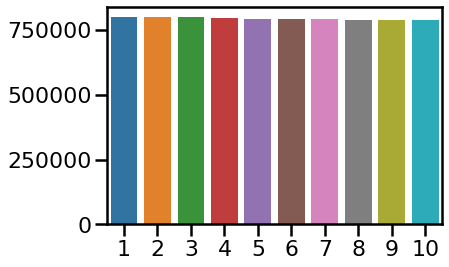

In [0]:
ax = sns.barplot(x = list(range(1,11)), y=top_10_expensive_pro,  )


**plot the top 10 most expensive property prices**


In [0]:
df['top_10_expensive_pro'] = df.index
sns.scatterplot(x = 'top_10_expensive_pro', y = 'tx_price', data = df)

**The 10 most unique inexpensive prices**


In [0]:
low_10_nexpensive_pro = df.sort_values(by = ['tx_price'],ascending=True)['tx_price'].unique()[0:10]
print(low_10_nexpensive_pro)

[200000 200100 200750 201953 202000 202530 203000 203255 204000 205000]


(array([2., 1., 1., 1., 0., 1., 0., 0., 1., 3.]),
 array([789000., 790100., 791200., 792300., 793400., 794500., 795600.,
        796700., 797800., 798900., 800000.]),
 <a list of 10 Patch objects>)

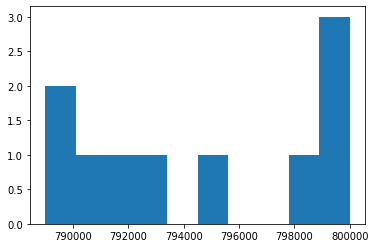

In [0]:
plt.(list(top_10_expenise_pro))

**16. How many different property types exist in the dataset ?**

In [0]:
df.property_type.value_counts()

Single-Family                    1080
Apartment / Condo / Townhouse     803
Name: property_type, dtype: int64

In [0]:
df.loc[df['property_type'] == 'Apartment / Condo / Townhouse', 'property_type'] = 'Apartment'

**60% of properties are single family owners**

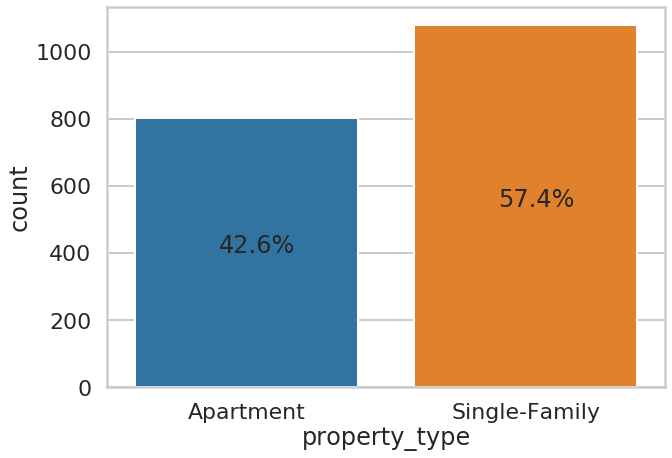

In [0]:
sns.set_style('whitegrid')

#ax = sns.countplot(x = 'property_type', data = df )

ax.set_xticklabels(['Aparrment','Single'], fontdict = {'fontsize': 16})
ax.set_ylabel('Total Observations', size = 16)
ax.set_xlabel('Types of Property', size = 16);

#Percentage
ax = sns.countplot(x="property_type", data=df)


total = len(df['property_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()




**17. xx percentage of house have 2,3 baths**

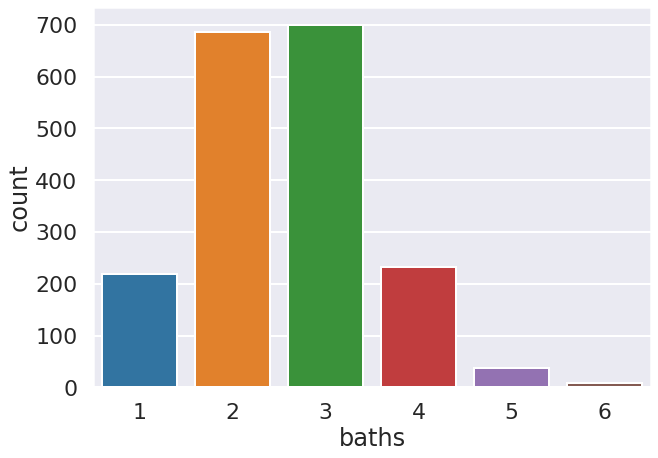

In [0]:
plt.rc('figure', figsize=(10, 7))
ax = sns.countplot(x = 'baths', data = df )



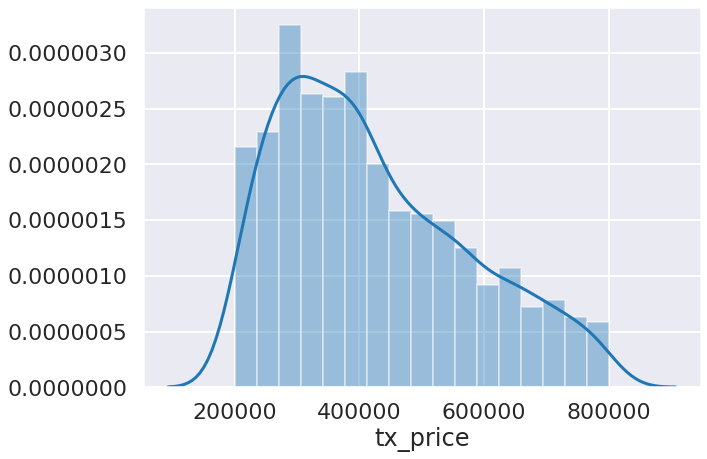

In [0]:
sns.distplot(df['tx_price']);

**Apartments with 2-3 bathrooms and 3-4 bedrooms are the most poplur ones**

Text(0.5, 1.0, 'Distribution of bedrooms')

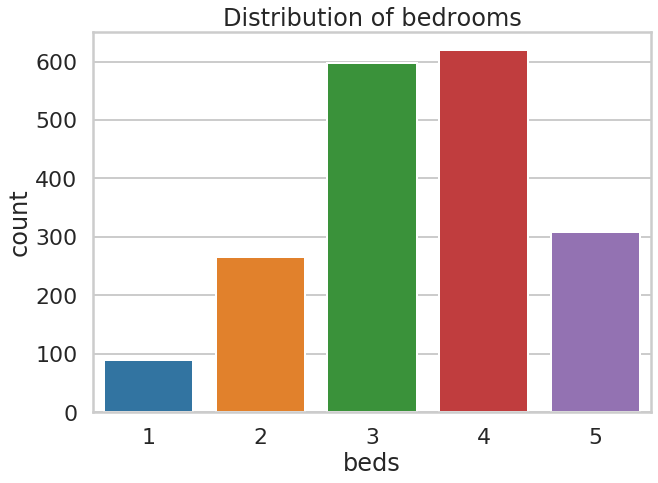

In [0]:
ax = sns.countplot(x = 'beds', data = df )
ax.set_title('Distribution of Bedrooms')

**Around 50% of the properties are below 400,000$**

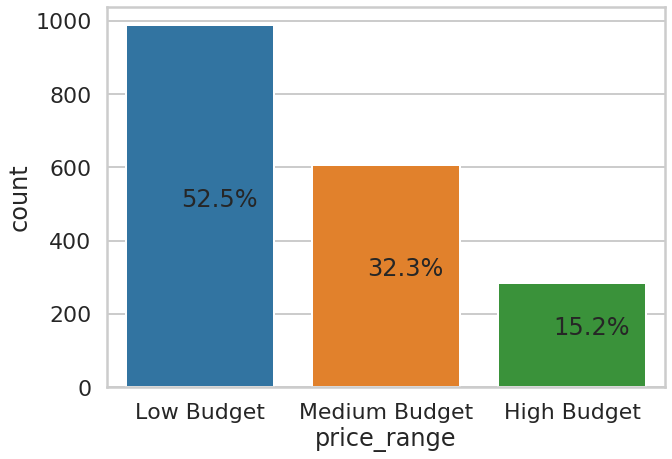

In [0]:
df.loc[df['tx_price'] < 400000,'price_range']= 'Low Budget'
df.loc[(df['tx_price'] >= 400000) & (df['tx_price'] <=600000),'price_range'] = 'Medium Budget'
df.loc[df['tx_price'] > 600000, 'price_range'] = 'High Budget'

ax = sns.countplot(x = 'price_range', data = df)

total = len(df['price_range'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [0]:
df.tx_year.unique()

array([2013, 2006, 2012, 2005, 2002, 2004, 2011, 2007, 2015, 2014, 2009,
       2016, 2008, 2010, 2003, 2001, 1994, 2000, 1996, 1999, 1995, 1998,
       1997, 1993])

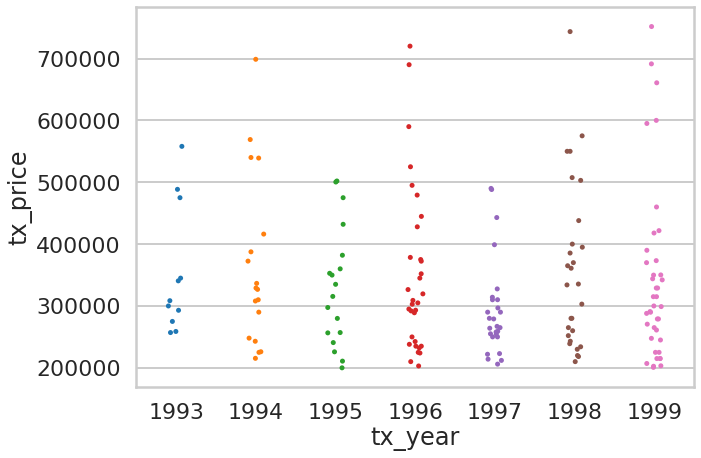

In [0]:
#plt.scatter(df.tx_year,df.tx_price , c = colors[np.array(df.price_range.astype(int))])
sns.set_context('poster')

df1 = df[df['tx_year'] <2000]
sns.stripplot(x = 'tx_year', y = 'tx_price', data = df1, jitter=1)

In [0]:
df.price_range.value_counts()

low       989
medium    608
high      286
Name: price_range, dtype: int64

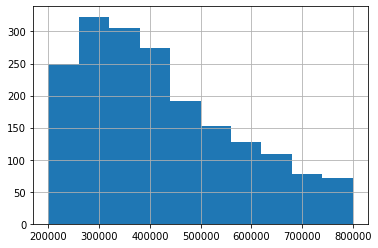

In [0]:
df.tx_price.hist()

low price 200k - 400k

Medium price 400k - 600k

High price 600k - 800k

In [0]:
df.keys()

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

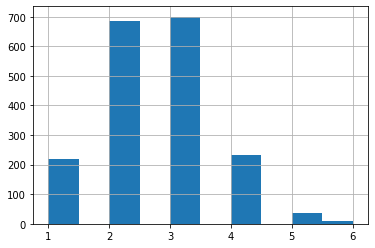

In [0]:
df.baths.hist()

1. how to answer the q:
2. import matplotlib.pyplot as plt
3. I am creating 2 categories for baths 1-3 and 4-6 
4. to create the x and y axis 
5. 

In [0]:
df.columns()

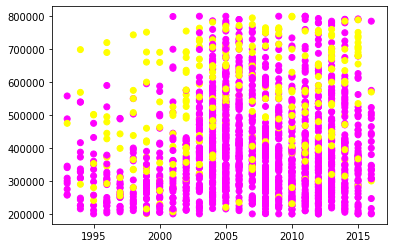

In [0]:
import matplotlib.pyplot as plt

df.loc[df['baths'] < 4, 'baths_range'] = 0
df.loc[df['baths'] > 3, 'baths_range'] = 1

x = df['tx_year']
y = df['tx_price']

p = np.array(["magenta", "yellow"])

plt.scatter(df.tx_year,df.tx_price , c = p[np.array(df.baths_range.astype(int))])



In [0]:
df.head()

In [0]:
plt.scatter(df.tx_year,df.tx_price , c = p)


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

df.loc[df['baths'] < 4, 'baths_range'] = 0
df.loc[df['baths'] > 3, 'baths_range'] = 1

x = df['tx_year']
y = df['tx_price']

p = np.array(["magenta", "yellow"])
palette_colors = {"Rural:"green", "Urban:"blue"}


plt.scatter(df.tx_year,df.tx_price , c= platette_colors)


SyntaxError: ignored

## Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school",
              data=student_data,
              hue="location",
              palette=palette_colors)

# Display plot
plt.show()

In [0]:
apl_price = [93.95, 112.15, 104.05, 144.85, 169.49]
ms_price = [39.01, 50.29, 57.05, 69.98, 94.39]
year = [2014, 2015, 2016, 2017, 2018]

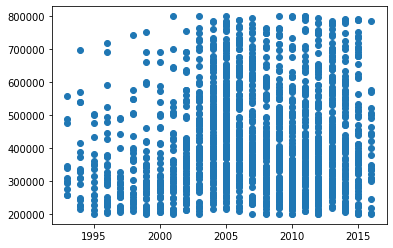

In [0]:
#plt.plot(df.tx_year, df.tx_price)
plt.scatter(df.tx_year, df.tx_price)


In [0]:
fig_1 = plt.figure(1, figsize=(20, 4.8))
chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.plot(year, apl_price)
chart_2.plot(year, ms_price)

In [0]:


beds_range_min = df1.groupby(['tx_year']).tx_price.median()
beds_range_max = df2.groupby(['tx_year']).tx_price.median()

fig_2 = plt.figure(1, figsize=(20, 4.8))
chart_3 = fig_2.add_subplot(121)
chart_4 = fig_2.add_subplot(122)

chart_3.scatter(df1.tx_year.unique(), beds_range_min)



In [0]:
df1.tx_year.shape

(954,)

In [0]:
beds_range_min

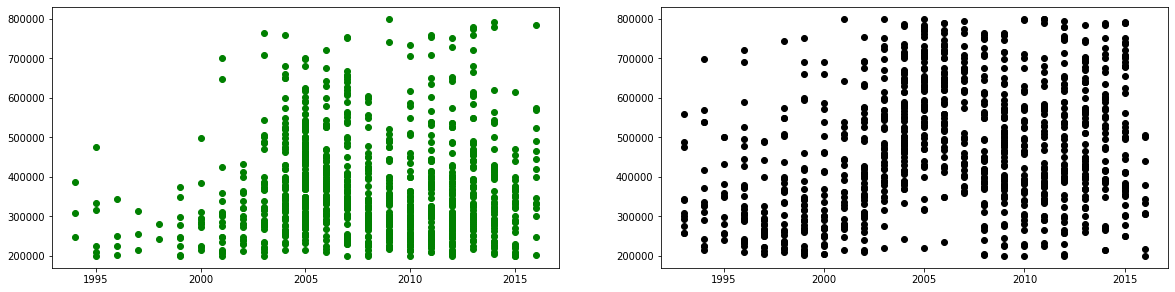

In [0]:
df1 = df.loc[df['beds'] < 4 ]
df2 = df.loc[df['beds'] > 3 ]


fig_1 = plt.figure(1, figsize= (20, 4.8))
chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.scatter(df1.tx_year, df1.tx_price, c = 'g')

chart_2.scatter(df2.tx_year, df2.tx_price, c = 'k')


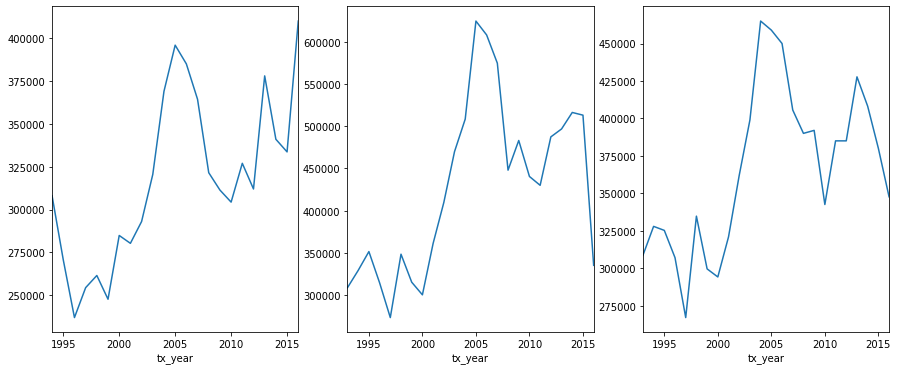

In [0]:
chart_1 = plt.subplot(131)
chart_2 = plt.subplot(132)
chart_3 = plt.subplot(133)


df1.groupby(['tx_year']).tx_price.median().plot(ax = chart_1, figsize = (15,6))
df2.groupby(['tx_year']).tx_price.median().plot(ax = chart_2, figsize = (15,6))
df.groupby(['tx_year']).tx_price.median().plot(ax = chart_3, figsize = (15,6))




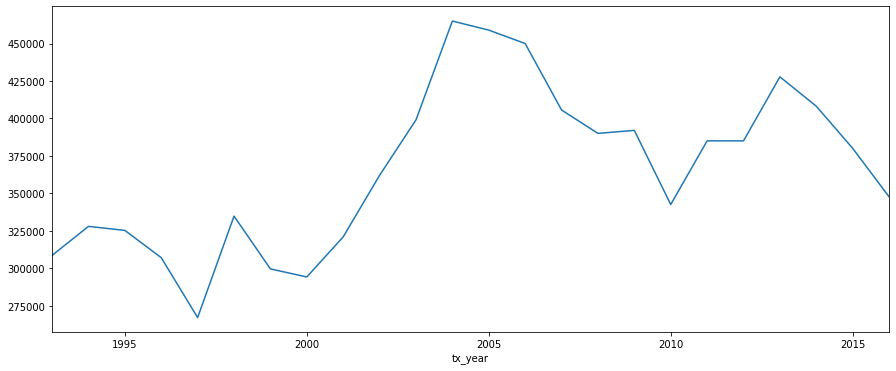

In [0]:
df.groupby(['tx_year']).tx_price.median().plot(figsize = (15,6))


(1993.0, 2016.0, 200000.0, 600000.0)

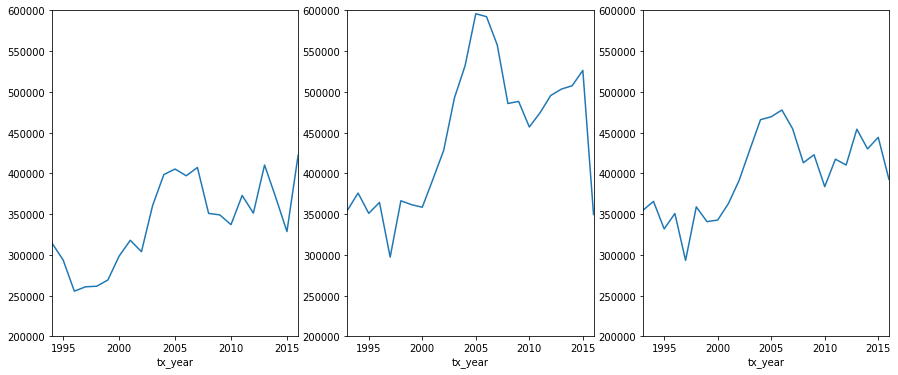

In [0]:
chart_1 = plt.subplot(131)
chart_1.set_xlim([1995, 2015])
chart_1.set_ylim([200000, 600000])

chart_2 = plt.subplot(132)
chart_2.set_xlim([1995, 2015])
chart_2.set_ylim([200000, 600000])

chart_3 = plt.subplot(133)
chart_3.set_xlim([1995, 2015])
chart_3.set_ylim([200000, 600000])


df1.groupby(['tx_year']).tx_price.mean().plot(ax = chart_1, figsize = (15,6))
df2.groupby(['tx_year']).tx_price.mean().plot(ax = chart_2, figsize = (15,6))
df.groupby(['tx_year']).tx_price.mean().plot(ax = chart_3, figsize = (15,6))

plt.axis()


(-0.5, 23.5, 200000.0, 600000.0)

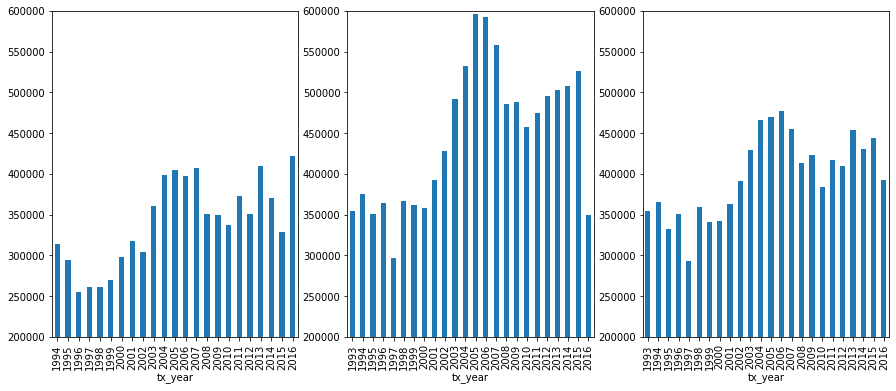

In [0]:
chart_1 = plt.subplot(131)
chart_1.set_xlim([1995, 2015])
chart_1.set_ylim([200000, 600000])

chart_2 = plt.subplot(132)
chart_2.set_xlim([1995, 2015])
chart_2.set_ylim([200000, 600000])

chart_3 = plt.subplot(133)
chart_3.set_xlim([1995, 2015])
chart_3.set_ylim([200000, 600000])


df1.groupby(['tx_year']).tx_price.mean().plot(ax = chart_1, kind = "bar", figsize = (15,6))
df2.groupby(['tx_year']).tx_price.mean().plot(ax = chart_2, kind = "bar", figsize = (15,6))
df.groupby(['tx_year']).tx_price.mean().plot(ax = chart_3, kind = "bar", figsize = (15,6))

plt.axis()


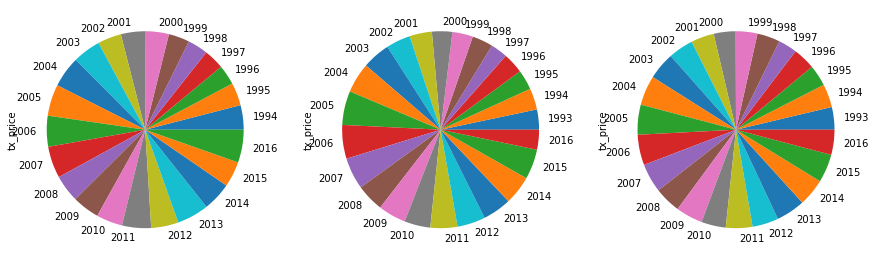

In [0]:
chart_1 = plt.subplot(131)
chart_1.set_xlim([1995, 1998])
chart_1.set_ylim([200000, 600000])

chart_2 = plt.subplot(132)
chart_2.set_xlim([1995, 1998])
chart_2.set_ylim([200000, 600000])

chart_3 = plt.subplot(133)
chart_3.set_xlim([1995, 1998])
chart_3.set_ylim([200000, 600000])


df1.groupby(['tx_year']).tx_price.mean().plot(ax = chart_1, kind = "pie", figsize = (15,6))
df2.groupby(['tx_year']).tx_price.mean().plot(ax = chart_2, kind = "pie", figsize = (15,6))
df.groupby(['tx_year']).tx_price.mean().plot(ax = chart_3, kind = "pie", figsize = (15,6))


Homework - divide the df into 3 groups of apartments: small, medium and large.
Plot the transaction price for each group of apartment and to compare them, and to explore type of plots insided (kind = ).


In [0]:
df.keys()

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [0]:
df['sqft']

In [0]:
df.head()

In [0]:
df.tail()

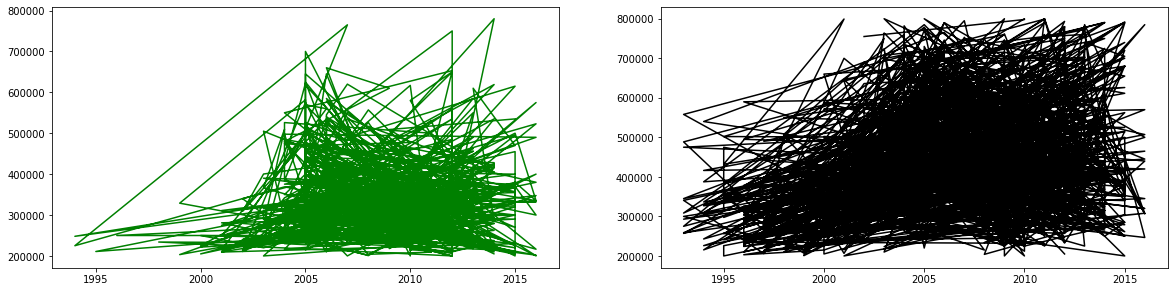

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

small = df.loc[df['sqft'] < 1500]
medium = df.loc[(df['sqft'] > 1499) & (df['sqft'] < 5000)]
large = df.loc[df['sqft'] > 4999] 

fig_1 = plt.figure(1, figsize= (20, 4.8))
chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)
#chart_3 = fig_1.add_subplot(123)

chart_1.plot(small.tx_year, small.tx_price,  c = 'g')
chart_2.plot(medium.tx_year, medium.tx_price, c = 'k')
#chart_3.plot(large.tx_year, large.tx_price,   c = 'y')





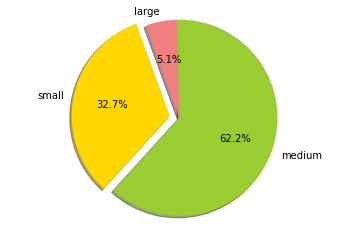

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'small', 'medium', 'large'
sizes = [small.shape[0], medium.shape[0], large.shape[0]]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=110)

plt.axis('equal')
plt.show()

In [0]:
large.shape[0]

In [0]:
small.shape

In [0]:
medium.shape

In [0]:
df.baths

0       1
1       1
2       1
3       1
4       1
       ..
1878    6
1879    6
1880    6
1881    6
1882    6
Name: baths, Length: 1883, dtype: int64

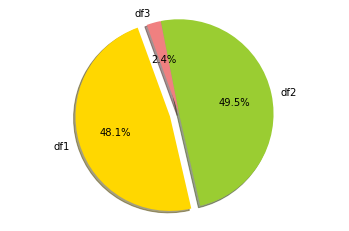

In [0]:
df1 = df[df['baths'] < 3]
df2 = df[(df['baths']> 2) & (df['baths']< 5)]
df3 = df[df['baths']> 4]

# Data to plot
labels = 'df1' , 'df2' , 'df3'
sizes = [df1.shape[0], df2.shape[0], df3.shape[0]]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=110)

plt.axis('equal')
plt.show()


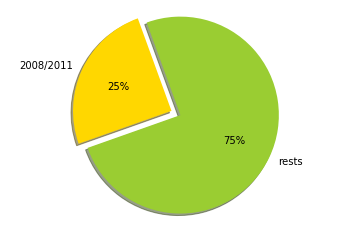

In [0]:
df1 = df[(df['tx_year'] > 2007) & (df['tx_year'] < 2012 )]


# Data to plot
labels = '2008/2011' , 'rests' 
sizes = [df1.shape[0], (df.shape[0] - df1.shape[0]) ]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=110)

plt.axis('equal')
plt.show()

In [0]:
df1 = df[(df['tx_year'] > 2007) & (df['tx_year'] < 2012 )]

df.shape[0] - df1.shape[0] 

1415

In [0]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [0]:
df.tx_year.unique()

array([2013, 2006, 2012, 2005, 2002, 2004, 2011, 2007, 2015, 2014, 2009,
       2016, 2008, 2010, 2003, 2001, 1994, 2000, 1996, 1999, 1995, 1998,
       1997, 1993])

we would like to create a property age column

In [0]:
#property_age = []
#df.loc[df['tx_year'] - df['year_built'], 'property_age'] 
df['property_age'] = df['tx_year'] - df['year_built']



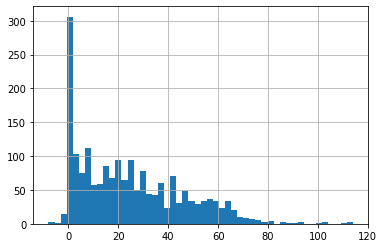

In [0]:
df.property_age.hist(bins = 50)

In [0]:
df.property_age

0        0
1       41
2       49
3        5
4       10
        ..
1878    -2
1879    59
1880     4
1881     3
1882    57
Name: property_age, Length: 1883, dtype: int64

we clean the data because we found out that some of the property age is under 0 , its mean it was sold before it was build and this did not make any sense.

In [0]:
df = df[df['property_age'] >= 0]


In [0]:
df = df.reset_index()

In [0]:
df[df['property_age'] == 0]



,index,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,property_age
0,0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0
18,18,363700,1,1,692,2007,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,180,14,37,34,104,13,72,68,36.0,25.0,75.0,302.0,104.0,8.0,3.0,2007,0
24,24,290800,1,1,704,2006,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,99,9,8,11,103,4,46,34,31.0,30.0,99.0,257.0,78.0,8.0,3.0,2006,0
40,40,285850,1,1,759,2006,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,99,9,8,11,103,4,46,34,31.0,30.0,99.0,266.0,81.0,8.0,3.0,2006,0
41,41,249298,1,1,759,2012,0,Apartment / Condo / Townhouse,Siding (Alum/Vinyl),NaN,1.0,49,6,4,5,33,1,17,25,27.0,38.0,35.0,251.0,76.0,5.0,3.0,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,1850,706095,5,5,3720,2004,10606,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,12,10,1,0,22,0,21,6,37.0,82.0,63.0,614.0,187.0,3.0,3.0,2004,0
1847,1859,771760,5,5,5270,2006,11761,Single-Family,Combination,Composition Shingle,1.0,0,0,0,0,1,0,1,3,42.0,84.0,58.0,506.0,143.0,5.5,2.0,2006,0
1851,1863,576475,5,5,5810,2002,8777,Single-Family,Wood,Wood Shake/ Shingles,1.0,13,2,0,1,17,0,18,6,35.0,70.0,73.0,897.0,273.0,8.0,3.0,2002,0
1856,1871,691331,5,5,6966,1999,62290,Single-Family,Siding (Alum/Vinyl),Other,1.0,0,0,0,0,1,0,0,1,46.0,93.0,65.0,860.0,262.0,8.0,3.0,1999,0


In [0]:
df

,index,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,property_age
0,0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0
1,1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,41
2,2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,49
3,3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,5
4,4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,1876,760000,5,5,7842,2003,436035,Single-Family,Combination,NaN,1.0,0,0,0,0,0,0,0,0,48.0,76.0,62.0,881.0,249.0,7.5,2.0,2008,5
1860,1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015,59
1861,1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999,4
1862,1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009,3


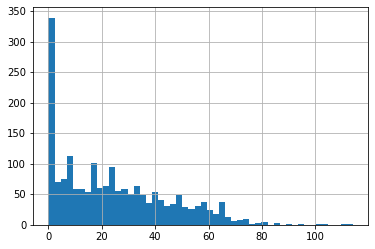

In [0]:
df.property_age.hist(bins = 50)

3.12.19 - homework - to create a pei chart which shows the perstange of homes sold on the 0 year. 

In [0]:
x = len(df[df['property_age'] == 0])

z = len(df) - x


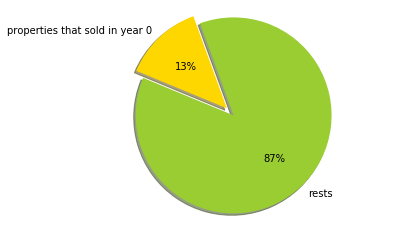

In [0]:
import matplotlib.pyplot as plt


labels = 'properties that sold in year 0' , 'rests' 


sizes = [x, z]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=110)

plt.axis('equal')
plt.show()

3.12.19 - Homework - to check how many properties were sold in 2008 whice were built in 2008 and to compare it to how many properties were sold after 2008, 2009, 2010, 2011


In [0]:
df08 = df[(df['tx_year'] == 2008 ) & (df['year_built'] == 2008 )]